### Alpha Vantage Daily IPO Stocks
- API for real time stock data
- Claimed the free API key up to 5 API requests per minute and 500 requests per day
- pip install alpha_vantage
- https://alphavantage.co

In [1]:
# Import dependencies.
import pandas as pd
import matplotlib.pyplot as pl
from alpha_vantage.timeseries import TimeSeries

In [2]:
# Import the API key.
from config import stocks_api_key

In [3]:
# Create the time series object and make the API call.
# For this exercise let's pull the data for symbol=MRM (Medirom Healthcare) IPO from Dec 29, 2021.

ts = TimeSeries(stocks_api_key, output_format='pandas')
data, meta = ts.get_daily('MRM', outputsize='full')

In [4]:
# Examine Meta Data.
# Information are the columns
# Symbol is the IPO symbol from our stocksanalysis.com scrapped data
# Last refreshed will show when data last updated 
# Output size = returns the full-length time series of 20+ years of historical data
meta

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'MRM',
 '3. Last Refreshed': '2021-03-19',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [5]:
# Examine Data Info.
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56 entries, 2021-03-19 to 2020-12-29
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    56 non-null     float64
 1   2. high    56 non-null     float64
 2   3. low     56 non-null     float64
 3   4. close   56 non-null     float64
 4   5. volume  56 non-null     float64
dtypes: float64(5)
memory usage: 2.6 KB


In [6]:
data.tail()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-01-05,14.10,14.5000,14.00,14.35,106015.0
2021-01-04,14.62,14.8000,14.00,14.20,97541.0
2020-12-31,14.50,14.8235,13.62,14.40,72956.0
2020-12-30,15.05,15.0500,13.82,14.85,283666.0
2020-12-29,19.80,19.8000,14.03,15.11,677226.0


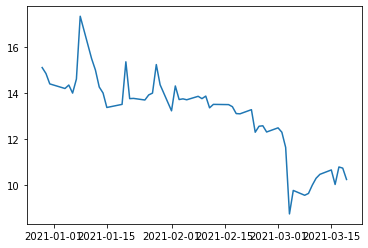

In [7]:
# Just visually taking a look at the daily closing data.
pl.plot(data['4. close'])

In [8]:
# Renaming Columns.
columns = ['open', 'high', 'low', 'close', 'volume']
data.columns = columns

In [9]:
# Make separate date and time columns.
data['TradeDate'] = data.index.date
#data['time'] = data.index.time - this code is needed if we are looking at minute intervals

In [10]:
# Checking out a single day of data.
data.loc['2020-12-29']

,open,high,low,close,volume,TradeDate
date,,,,,,
2020-12-29,19.8,19.8,14.03,15.11,677226.0,2020-12-29


In [11]:
# Export the DataFrame to a CSV file.
data.to_csv(r'C:\Users\Lora B\Documents\Development\Final_Project\API_Exercise\MRM_IPO.csv', index = False)